In [51]:
# %%writefile Ind_ADX_TRE.py

import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

import Ind_Model_Base

import numpy as np
import pandas as pd

import QUANTAXIS as QA

# import matplotlib.pyplot as plt


import Analysis_Funs as af

import talib
import base.JuUnits as ju

# %load_ext autoreload
# %autoreload 2
# %aimport Analysis_Funs,Ind_Model_Base


class CCI(Ind_Model_Base.Ind_Model):
    """ 顺势指标
        
    """
    optimum_param={'valid':False, 'main':'CCI', 'desition_direct':1, 'freq':'d','neutralize':{'enable':False,'static_mv':False}}
    
    def __init__(self,data, frequence=QA.FREQUENCE.DAY):
        super().__init__(data, 'SAR', frequence)
        
        ### 正式使用时由实例设置为true来加速
#         self.set_ignore_sub_ind(False)
        

    def on_set_params_default(self):
        return {'timeperiod':14}
    
        
    def on_indicator_structuring(self, data):
        return self.excute_for_multicode(data, self.kernel, **self.pramas)
    
    def on_desition_structuring(self, data, ind_data):
        """
        """
        def feature(item_df):
            direct = np.sign(item_df['CCI'] - item_df['CCIMA'])
            return -1 * np.abs( af.timeline_event_continuity(direct.fillna(0)) )
#             return af.timeline_event_continuity(direct.fillna(0))

        event_continuity = self.excute_for_multicode(self.ind_df,
                                         lambda x: pd.DataFrame(feature(x),
                                         index=x.index,
                                         columns=['feature_CCI_CONTINUITY_NEG_ABS']))
        # NEG_ABS时防止0干扰
        event_continuity[event_continuity==0] = np.nan
        self.ind_df = pd.concat([self.ind_df, event_continuity],axis=1)
        return None #event_continuity
        
    def kernel(self,dataframe, timeperiod):
        if len(dataframe)<=timeperiod:
            return None
                
        
        cci = talib.CCI(dataframe.high, dataframe.low, dataframe.close, timeperiod=timeperiod)/100
        cci.name = 'CCI'


        try:
            ma = talib.MA(cci, timeperiod)
        except:
            print(dataframe)
        ma.name = 'CCIMA'
        
        df = pd.concat([cci,ma], axis=1)
#         df = pd.DataFrame(cci)
        return df

    def plot(self):
        if self.fast_mode:
            raise 'fast_mode is True,cant draw chart'
        
        


Wall time: 425 ms


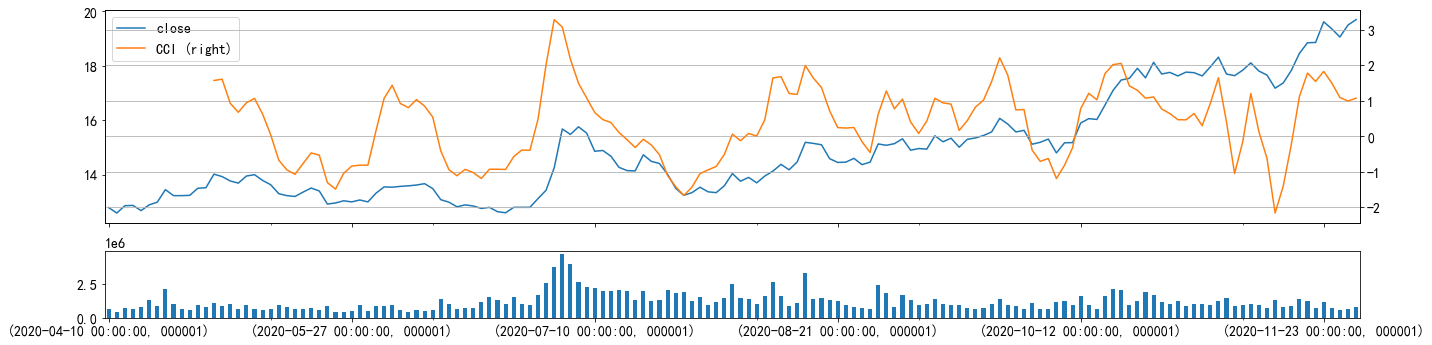

In [45]:
%%time
import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)
import tools.Sample_Tools as smpl
import Analysis_Funs as af
import base.JuUnits as ju
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import talib
data = smpl.get_data(['000001'],end='2020-11-29',gap=154).data

cci =CCI(data)
cci.fit()


fig = plt.figure(figsize=(1620/72,620/72))
ax1= fig.add_subplot(2,1,1)
pd.concat([data.close,cci.ind_df['CCI']],axis=1).plot(secondary_y=['CCI'],ax=ax1)
plt.grid()
ax2= fig.add_subplot(6,1,4,sharex=ax1)
data.volume.plot(kind='bar',ax=ax2)
ax2.tick_params(labelbottom=True)  #  解决share后标签不可见的问题。
ax2.xaxis.set_major_locator(ticker.MaxNLocator(6))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2021-11-28


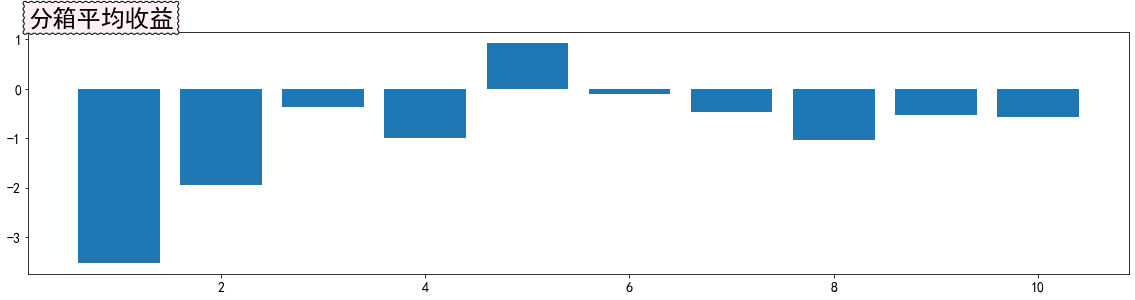

2020-11-28


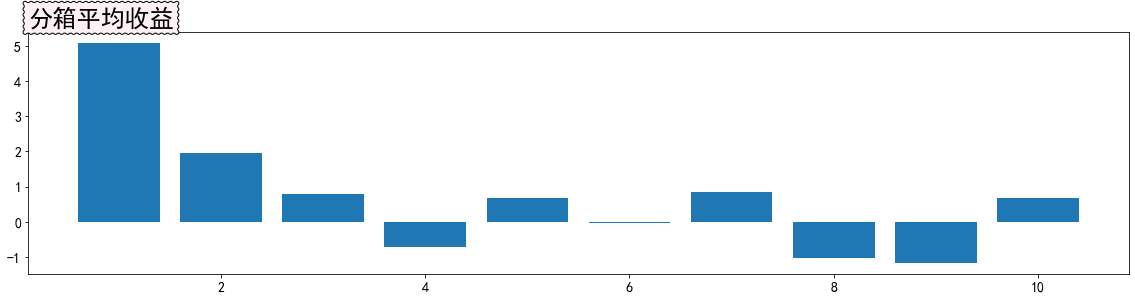

2019-11-28


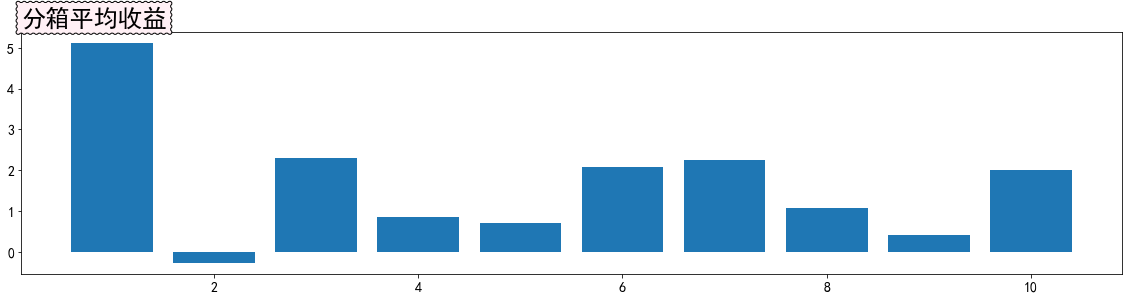

2018-11-28


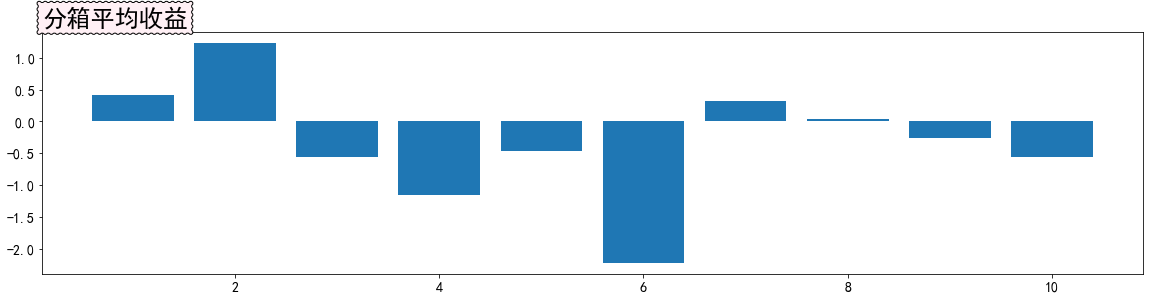

2017-11-28


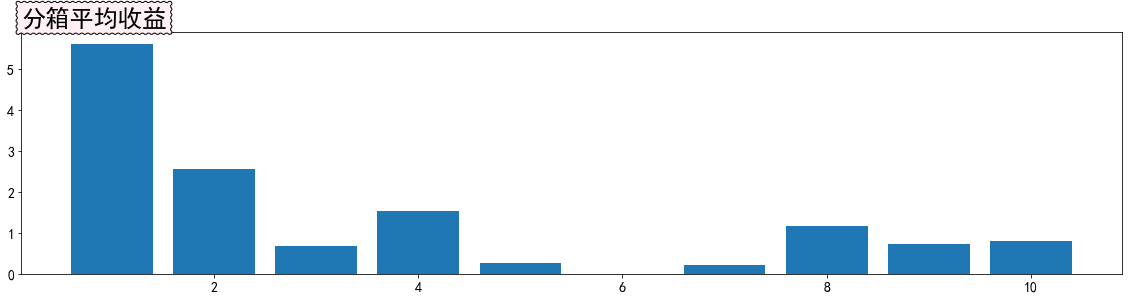

2016-11-28


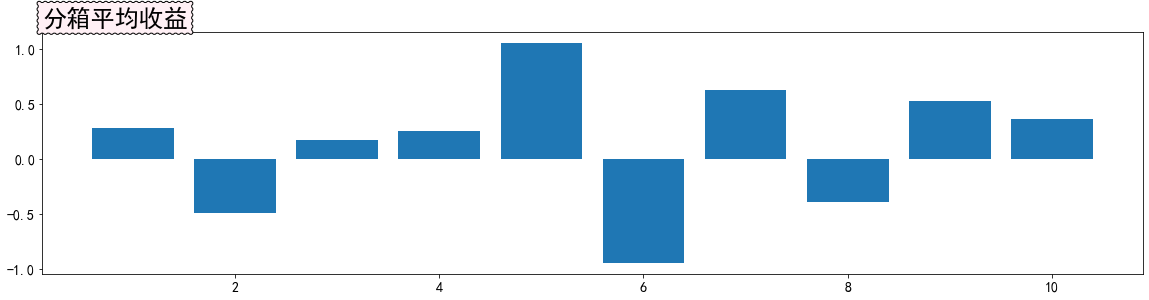

Wall time: 16.2 s


In [52]:
%%time
from tools.Test_Tools import FactorTest

%load_ext autoreload
%autoreload 1
%aimport tools.Test_Tools

dates = ['2021-11-28','2020-11-28','2019-11-28','2018-11-28','2017-11-28','2016-11-28']
# dates = ['2020-11-28']
for date in dates:
    print(date)
    test = FactorTest(CCI, sample='上证50', freq="d",end=date, gap=250, only_main=True, neutralize={'enable':False,'static_mv':False},target_field='feature_CCI_CONTINUITY_NEG_ABS')
    test.process()
    test.plot(only_binned=True)


2021-11-28


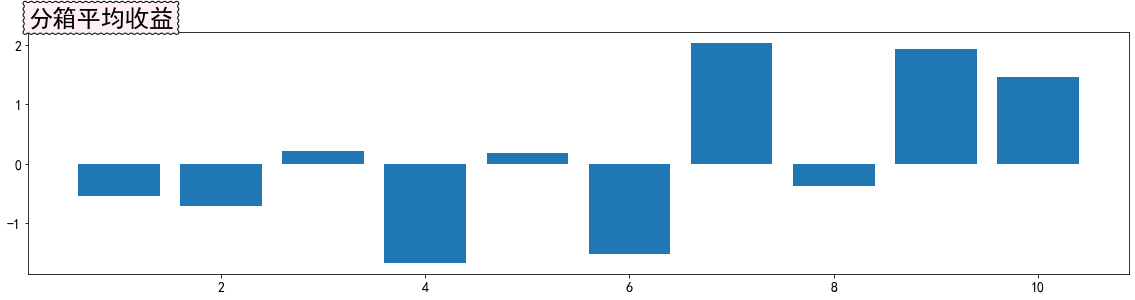

2020-11-28


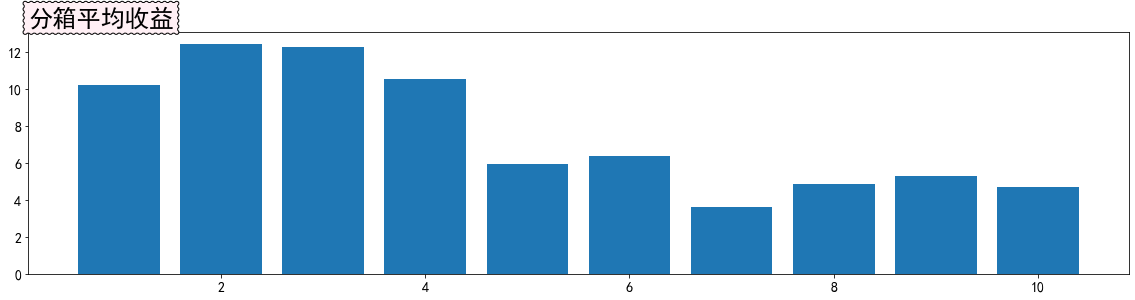

2019-11-28


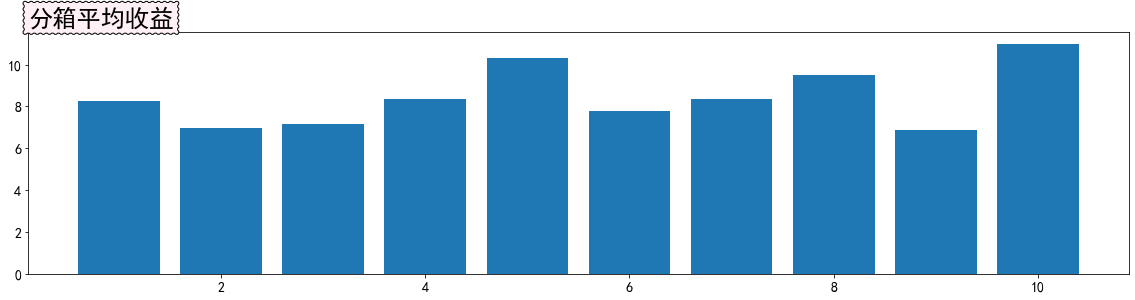

2018-11-28


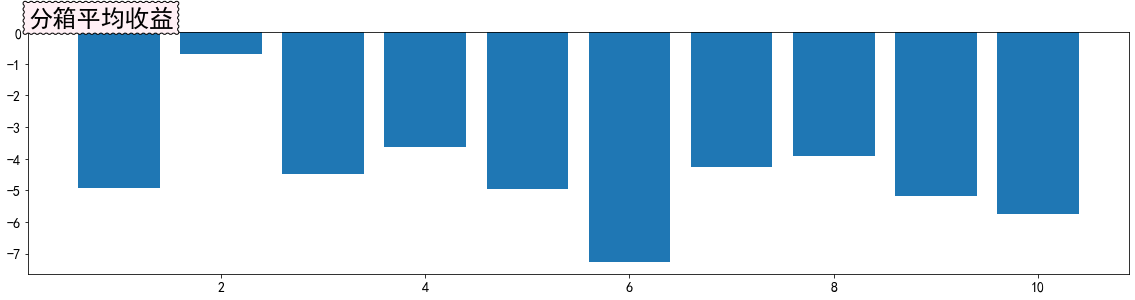

2017-11-28


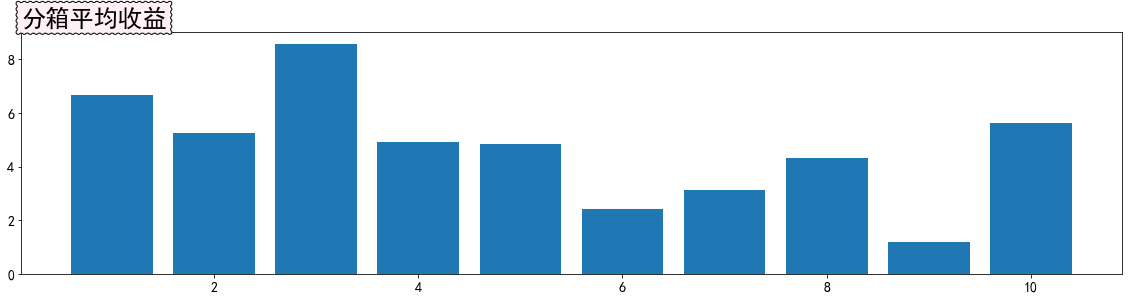

2016-11-28


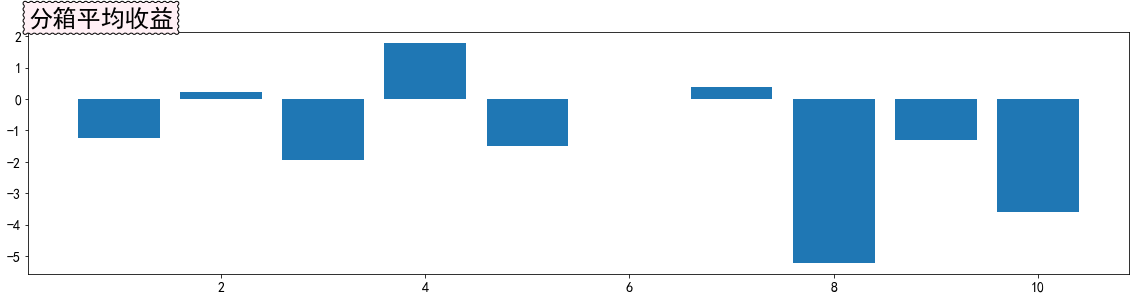

In [53]:
dates = ['2021-11-28','2020-11-28','2019-11-28','2018-11-28','2017-11-28','2016-11-28']
# dates = ['2020-11-28']
for date in dates:
    print(date)
    test = FactorTest(CCI, sample='沪深300', freq="d",end=date, gap=250, only_main=True, neutralize={'enable':True,'static_mv':False},target_field='feature_CCI_CONTINUITY_NEG_ABS')
    test.process()
    test.plot(only_binned=True)